# How a Neural Network *Learns* from Data

In the previous notebook, we saw how a network with *random* parameters makes predictions. Now, we'll explore the most important concept: how do we find the right values for those parameters? This is the process of **training**, or "learning".

The goal is to create an algorithm where you can show the network a large amount of **training data**—images with correct labels—and have it automatically <mark>adjust those 13,000 weights and biases so as to improve its performance</mark>.

## 1. The Importance of Separate Training and Test Data

The ultimate goal is not for the network to just memorize the training images. We want it to learn the underlying patterns of what makes a "3" look like a "3". This ability to perform well on new, unseen data is called **generalization**.

To measure this, we split our dataset into two parts:
1.  **Training Data**: The large set of labeled images we show the network so it can learn.
2.  **Testing Data**: A separate set of labeled images the network has **never seen before**. We use this to get an unbiased evaluation of how well it actually learned.

The **MNIST database**, a famous collection of tens of thousands of handwritten digits, is already conveniently split for us.

Done.
Done.
Done.
Done.
Number of images in Training Data: 60000
Number of images in Testing Data: 10000


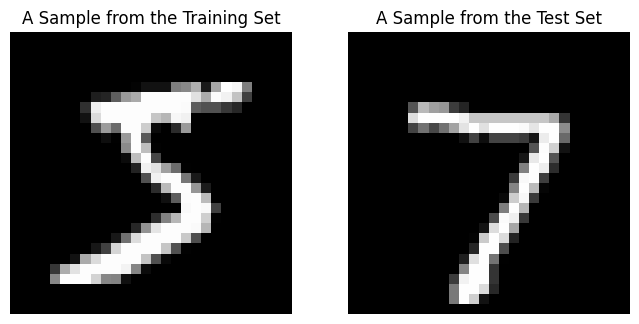

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from utils import get_mnist



# Load the split dataset
x_train, y_train, x_test, y_test = get_mnist()

print(f"Number of images in Training Data: {x_train.shape[0]}")
print(f"Number of images in Testing Data: {x_test.shape[0]}")

# --- Visualize one sample from each set ---
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(x_train[0], cmap='gray')
axes[0].set_title("A Sample from the Training Set")
axes[0].axis('off')

axes[1].imshow(x_test[0], cmap='gray')
axes[1].set_title("A Sample from the Test Set")
axes[1].axis('off')

plt.show()

## 2. Learning as a Calculus Exercise

Describing a machine as "learning" can sound like science fiction. However, the actual process is much more grounded in mathematics.

<mark>It feels a lot less like some crazy sci-fi premise, and a lot more like a calculus exercise... basically it comes down to finding the minimum of a certain function.</mark>

This special function is called the **Loss Function** (or Cost Function). Its job is to measure how "wrong" the network's predictions are compared to the true labels.

-   **High Loss**: The network is performing poorly.
-   **Low Loss**: The network is performing well.

The entire goal of training is to adjust the 13,000+ weights and biases to **minimize the value of this loss function**.



Imagine the loss value is your altitude on a foggy mountain. Your goal is to get to the lowest point in the valley. You can't see the whole landscape, but you can feel which way is downhill from where you're standing.

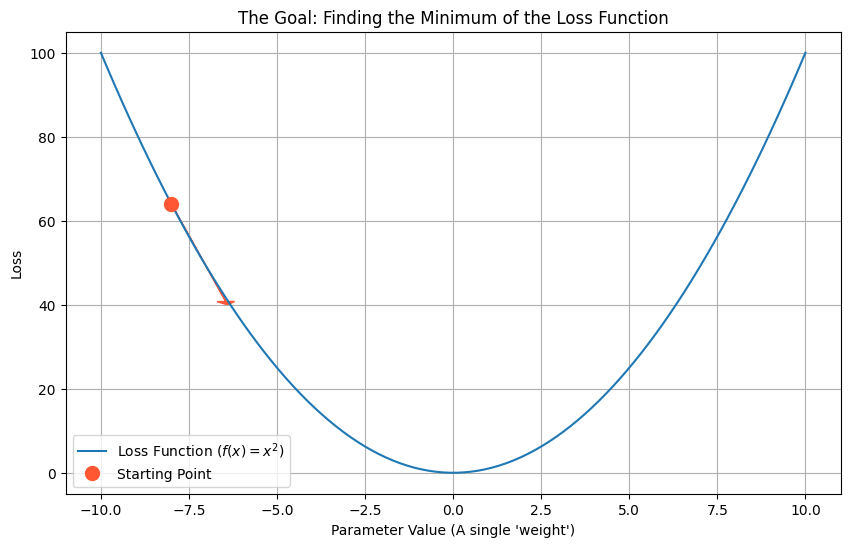

At our starting point, the 'downhill' direction points towards the minimum at x=0.


In [2]:
# Let's visualize this concept with a simple function, f(x) = x^2
# Our goal is to find the value of x that minimizes the function's output.

def loss_function(x):
    return x**2

def derivative(x):
    # The derivative tells us the slope (direction of "downhill")
    return 2 * x

# --- Visualization ---
x_vals = np.linspace(-10, 10, 100)
y_vals = loss_function(x_vals)

# Our starting point (like our initial random weights)
current_x = -8.0
learning_rate = 0.1
arrow_color = '#FF5733'

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='Loss Function ($f(x) = x^2$)')
plt.plot(current_x, loss_function(current_x), 'o', color=arrow_color, markersize=10, label='Starting Point')

# Calculate the gradient (slope) at our starting point
grad = derivative(current_x)

# The direction to move is opposite to the gradient
step = -learning_rate * grad

# Draw an arrow showing the "step" downhill
plt.arrow(current_x, loss_function(current_x), step, loss_function(current_x + step) - loss_function(current_x) - 1,
          head_width=0.5, head_length=0.8, fc=arrow_color, ec=arrow_color, length_includes_head=True)

plt.title("The Goal: Finding the Minimum of the Loss Function")
plt.xlabel("Parameter Value (A single 'weight')")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

print("At our starting point, the 'downhill' direction points towards the minimum at x=0.")

## 3. How We Find the Minimum: Gradient Descent

The algorithm for "walking downhill" to the minimum of the loss function is called **Gradient Descent**. It's an iterative process:

1.  **Make a Prediction**: Pass the training data through the network.
2.  **Calculate Loss**: See how wrong the predictions are.
3.  **Calculate Gradients**: For each of the 13,000 parameters, calculate the gradient (the "slope" of the loss). This tells us how a small change in that one parameter will affect the total loss.
4.  **Update Parameters**: Adjust all 13,000 weights and biases by taking a small step in the direction *opposite* to their gradient.
5.  **Repeat**: Go back to step 1 and repeat this process hundreds or thousands of times.

Each repetition nudges the parameters into a better configuration, gradually lowering the loss and making the network more accurate. Let's animate this process on our simple function.

After 25 steps, the parameter value is very close to the minimum: -0.0302


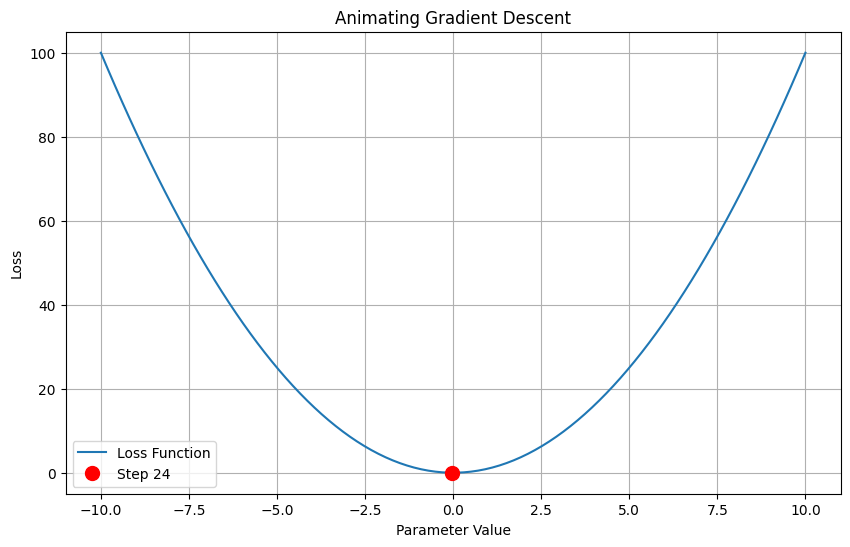

In [6]:
import time
from IPython.display import display, clear_output

# --- Animate Gradient Descent ---
current_x = -8.0
learning_rate = 0.1
iterations = 25

fig, ax = plt.subplots(figsize=(10, 6))

for i in range(iterations):
    ax.clear()
    
    # Plot the function
    ax.plot(x_vals, y_vals, label='Loss Function')
    
    # Plot the current point
    ax.plot(current_x, loss_function(current_x), 'ro', markersize=10, label=f'Step {i}')
    
    # Calculate gradient and update x
    grad = derivative(current_x)
    current_x = current_x - learning_rate * grad
    
    # Setup plot
    ax.set_title("Animating Gradient Descent")
    ax.set_xlabel("Parameter Value")
    ax.set_ylabel("Loss")
    ax.grid(True)
    ax.legend()
    
    display(fig)
    clear_output(wait=True)
    time.sleep(0.1)

print(f"After {iterations} steps, the parameter value is very close to the minimum: {current_x:.4f}")